<a href="https://colab.research.google.com/github/5234560002ebnida/nonfictioner/blob/main/ichimoku_cloud_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Timeframe: day


/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


              Close  Conversion Line  Base Line  Lead Line 1  Lead Line 2  \
Date                                                                        
2012-05-17  55500.0              NaN        NaN          NaN          NaN   
2012-05-18  54300.0              NaN        NaN          NaN          NaN   
2012-05-21  53600.0              NaN        NaN          NaN          NaN   
2012-05-22  54800.0              NaN        NaN          NaN          NaN   
2012-05-23  53800.0              NaN        NaN          NaN          NaN   
...             ...              ...        ...          ...          ...   
2024-07-18  48750.0          47475.0    50150.0      43850.0      46625.0   
2024-07-19  47900.0          47475.0    50150.0      43850.0      46625.0   
2024-07-22  48000.0          47475.0    50350.0      43850.0      46625.0   
2024-07-23  47350.0          47475.0    50350.0      43662.5      46625.0   
2024-07-24  46250.0          47475.0    50350.0      43537.5      46625.0   

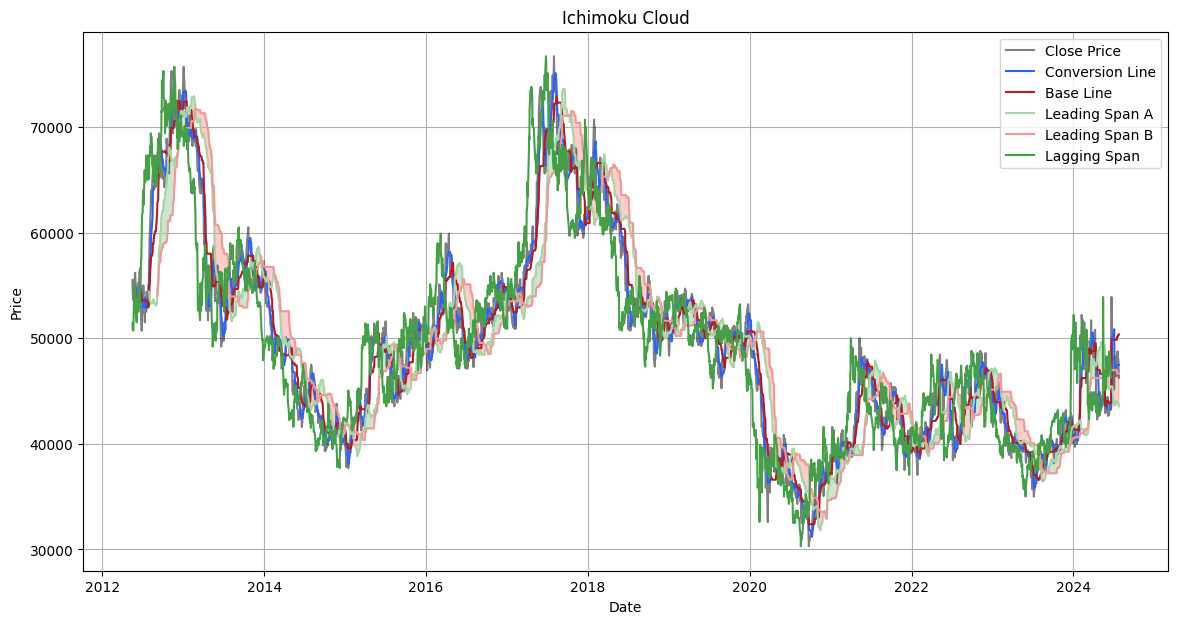


Timeframe: week


/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


              Close  Conversion Line  Base Line  Lead Line 1  Lead Line 2  \
Date                                                                        
2004-08-06  23400.0              NaN        NaN          NaN          NaN   
2004-08-13  22950.0              NaN        NaN          NaN          NaN   
2004-08-20  22200.0              NaN        NaN          NaN          NaN   
2004-08-27  22300.0              NaN        NaN          NaN          NaN   
2004-09-03  21500.0              NaN        NaN          NaN          NaN   
...             ...              ...        ...          ...          ...   
2024-06-28  46900.0          49850.0    48575.0      40025.0      40300.0   
2024-07-05  48300.0          49850.0    48575.0      40337.5      40300.0   
2024-07-12  46400.0          49850.0    48575.0      40775.0      40300.0   
2024-07-19  47900.0          49850.0    48750.0      40762.5      40300.0   
2024-07-24  46250.0          49850.0    49525.0      40837.5      40250.0   

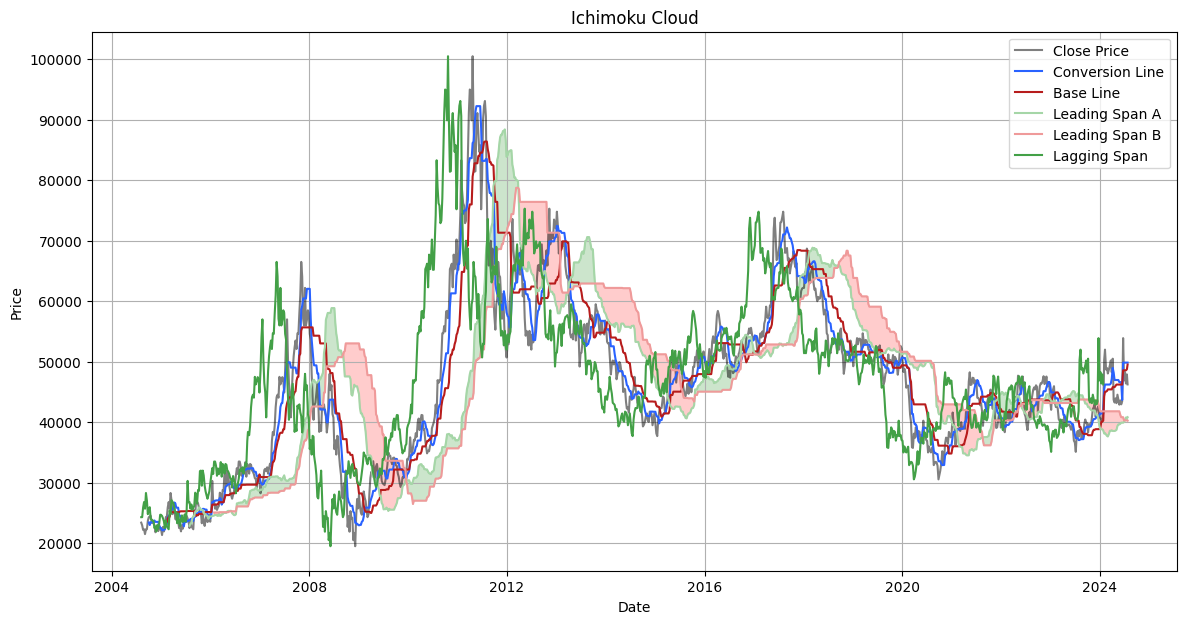


Timeframe: month


/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


              Close  Conversion Line  Base Line  Lead Line 1  Lead Line 2  \
Date                                                                        
2004-08-31  21600.0              NaN        NaN          NaN          NaN   
2004-09-30  24650.0              NaN        NaN          NaN          NaN   
2004-10-29  23800.0              NaN        NaN          NaN          NaN   
2004-11-30  22550.0              NaN        NaN          NaN          NaN   
2004-12-30  22400.0              NaN        NaN          NaN          NaN   
...             ...              ...        ...          ...          ...   
2024-03-29  48250.0          43650.0    43650.0      42825.0      50900.0   
2024-04-30  44900.0          45050.0    43650.0      42012.5      50900.0   
2024-05-31  43600.0          45250.0    43650.0      41250.0      50900.0   
2024-06-28  46900.0          47775.0    46000.0      40987.5      50900.0   
2024-07-24  46250.0          48400.0    46000.0      41737.5      50450.0   

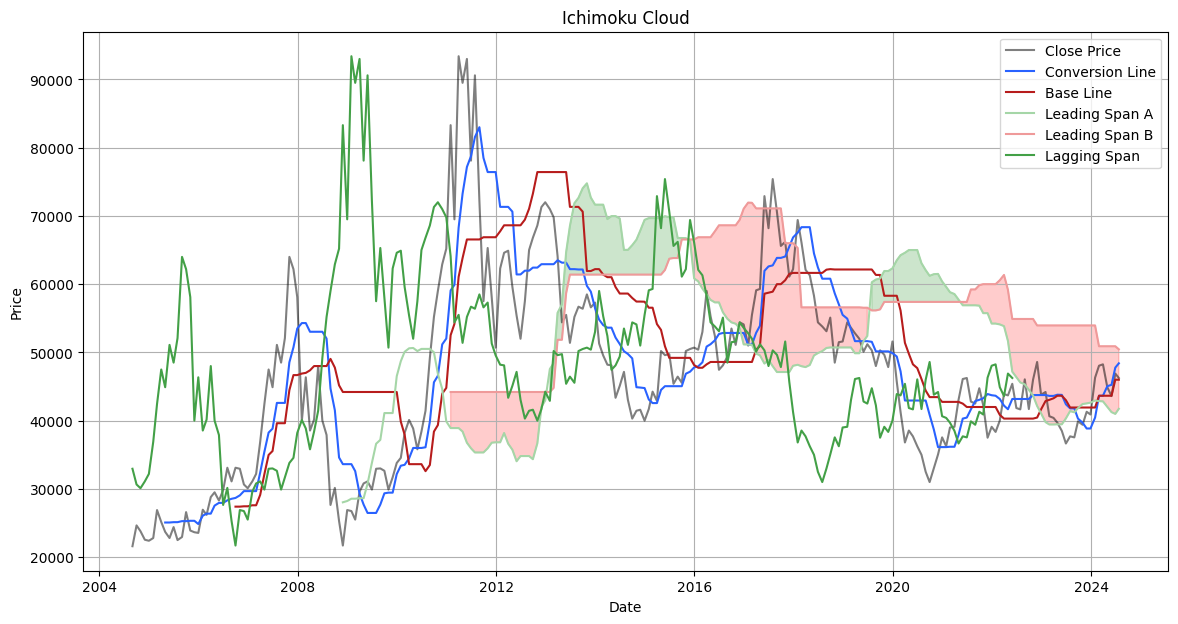

In [8]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def get_price(symbol, startTime, endTime, timeframe='day'):
    count = 3000
    url = f"https://fchart.stock.naver.com/sise.nhn?symbol={symbol}&timeframe={timeframe}&count={count}&requestType=0"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    params = {
        'symbol': symbol,
        'requestType': 1,
        'startTime': startTime,
        'endTime': endTime,
        'timeframe': timeframe
    }

    columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    data = []
    items = soup.select('item')
    for item in items:
        row = item['data'].split('|')
        data.append(row)

    df = pd.DataFrame(data, columns=columns)

    # 'Date' 컬럼을 datetime으로 변환하고 인덱스로 설정
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    return df.astype(float)

def calculate_ichimoku(data, conversionPeriods=9, basePeriods=26, laggingSpan2Periods=52, displacement=26):
    high = data['High']
    low = data['Low']
    close = data['Close']

    def donchian(n):
        return (high.rolling(window=n).max() + low.rolling(window=n).min()) / 2

    conversionLine = donchian(conversionPeriods)
    baseLine = donchian(basePeriods)
    leadLine1 = ((conversionLine + baseLine) / 2).shift(displacement)
    leadLine2 = donchian(laggingSpan2Periods).shift(displacement)
    laggingSpan = close.shift(-displacement)

    data['Conversion Line'] = conversionLine
    data['Base Line'] = baseLine
    data['Lead Line 1'] = leadLine1
    data['Lead Line 2'] = leadLine2
    data['Lagging Span'] = laggingSpan

    return data

def plot_ichimoku(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.5)
    plt.plot(data.index, data['Conversion Line'], label='Conversion Line', color='#2962FF')
    plt.plot(data.index, data['Base Line'], label='Base Line', color='#B71C1C')
    plt.plot(data.index, data['Lead Line 1'], label='Leading Span A', color='#A5D6A7')
    plt.plot(data.index, data['Lead Line 2'], label='Leading Span B', color='#EF9A9A')
    plt.plot(data.index, data['Lagging Span'], label='Lagging Span', color='#43A047')

    # 구름 채우기
    plt.fill_between(data.index, data['Lead Line 1'], data['Lead Line 2'],
                     where=data['Lead Line 1'] >= data['Lead Line 2'], color='green', alpha=0.2)
    plt.fill_between(data.index, data['Lead Line 1'], data['Lead Line 2'],
                     where=data['Lead Line 1'] < data['Lead Line 2'], color='red', alpha=0.2)

    plt.title(f"Ichimoku Cloud")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# 사용 예시
symbol = '078930'  # GS종목코드
startTime = '20220501'
endTime = '20220518'

timeframes = ['day', 'week', 'month']
for timeframe in timeframes:
    print(f"\nTimeframe: {timeframe}")
    df = get_price(symbol, startTime, endTime, timeframe)
    df = calculate_ichimoku(df)
    print(df[['Close', 'Conversion Line', 'Base Line', 'Lead Line 1', 'Lead Line 2', 'Lagging Span']])
    plot_ichimoku(df)
